### Radar system Using Vector Network Analyzer

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

c = 3e8
pad_factor = 4

In [2]:
file_1 = "35cm.xlsx"
file_2 = "correct1m.xlsx"

data_1 = pd.read_excel(file_1)
data_2 = pd.read_excel(file_2)

freq_1 = data_1['Frequency'].values
freq_2 = data_2['Frequency'].values

gain_1 = data_1['s11-gain (db)'].values
gain_2 = data_2['s11-gain (db)'].values

phase_1 = data_1['s11-phase (°)'].values
phase_2 = data_2['s11-phase (°)'].values

In [3]:
mag_1 = 10 ** (gain_1 / 20)
mag_2 = 10 ** (gain_2 / 20)

rad_1 = np.deg2rad(phase_1)
rad_2 = np.deg2rad(phase_2)

complex_1 = mag_1 * np.exp(-1j *  rad_1)
complex_2 = mag_2 * np.exp(-1j *  rad_2)

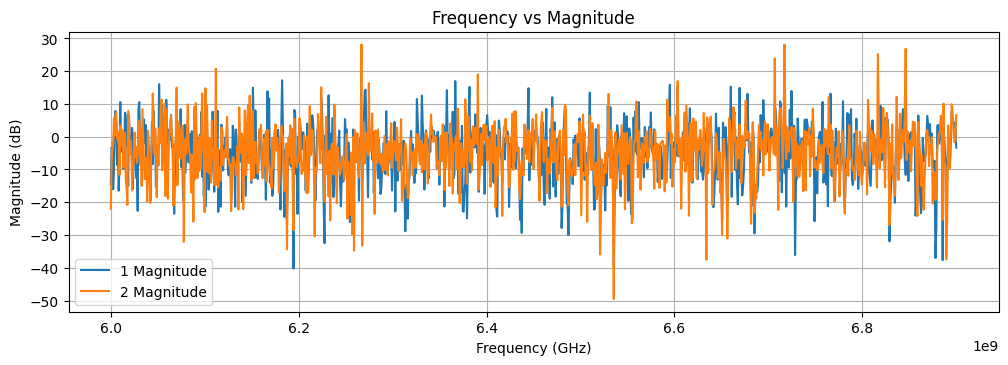

In [4]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 1, 1)
plt.plot(freq_1, gain_1, label='1 Magnitude')
plt.plot(freq_2, gain_2, label='2 Magnitude')
plt.xlabel('Frequency (GHz)')
plt.ylabel('Magnitude (dB)')
plt.title('Frequency vs Magnitude')
plt.legend()
plt.grid()
plt.show()

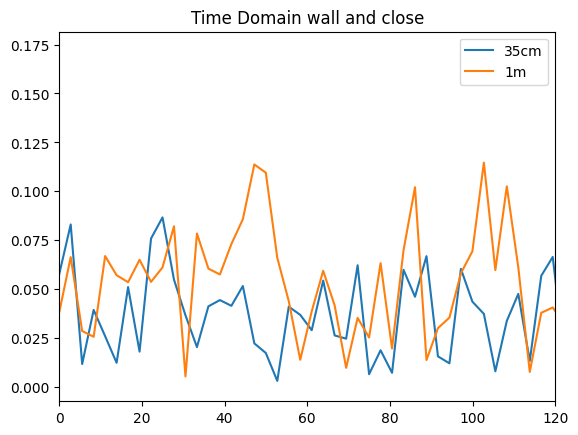

In [21]:
s11_t_1 = np.fft.ifft(complex_1)
s11_t_2 = np.fft.ifft(complex_2)

delta_f = 0.9e6
B = 0.9e9  
c = 3e8 
delta_r = c/ (2 * B)
range_axis = np.arange(0, 1000) * (c / (2 * B)) * 16.66

plt.figure()
plt.plot(range_axis, np.abs(s11_t_1), label='35cm')
plt.plot(range_axis, np.abs(s11_t_2), label='1m')
plt.xlim(0, 120)
plt.title('Time Domain wall and close')
plt.legend()